In [1]:
!pip install scikit-plot


You should consider upgrading via the '/home/ccs/Notebooks/my_env/bin/python3.6 -m pip install --upgrade pip' command.


In [2]:
import sys
!{sys.executable} -m pip install xgboost

You should consider upgrading via the '/home/ccs/Notebooks/my_env/bin/python3.6 -m pip install --upgrade pip' command.


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier as xgb
import warnings

In [4]:
%matplotlib inline
sns.set_style("darkgrid")
warnings.filterwarnings("ignore")
plt.rc("font", family="serif", size=15)

In [5]:
PdM_errors_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_errors.csv"
 
errors = pd.read_csv(PdM_errors_url)
errors.head(5)


,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [13]:
maint=pd.read_csv('/home/ccs/Notebooks/Predictive_Maintanence/maint_mock_test.csv',sep='\t')
 
# maint = pd.read_csv(maint_url)
maint.head()

,datetime,machineID,comp
0,2015-01-02 06:00:00,93,comp17
1,2015-01-02 06:00:00,69,comp15
2,2015-01-02 06:00:00,88,comp14
3,2015-01-02 06:00:00,26,comp21
4,2015-01-02 06:00:00,33,comp23


In [14]:
pd.set_option('display.max_rows', 500)
rows = maint['machineID'].groupby(maint['comp']).value_counts()
rows.head(500)

comp    machineID
comp1   23           7
        27           6
        33           6
        57           6
        64           6
        30           5
        31           5
        38           5
        59           5
        85           5
        96           5
        6            4
        7            4
        16           4
        39           4
        55           4
        56           4
        58           4
        60           4
        73           4
        74           4
        80           4
        83           4
        92           4
        0            3
        2            3
        9            3
        12           3
        32           3
        40           3
        44           3
        49           3
        50           3
        52           3
        67           3
        81           3
        84           3
        86           3
        87           3
        89           3
        3            2
        5            2
        10      

In [15]:
failures=pd.read_csv('/home/ccs/Notebooks/Predictive_Maintanence/failures_mock_test.csv',sep = '\t')
 
# failures = pd.read_csv(failures_url)
failures.head()

,datetime,machineID,failure
0,2015-01-02 06:00:00,95,comp14
1,2015-01-02 06:00:00,81,comp12
2,2015-01-02 06:00:00,79,comp11
3,2015-01-02 06:00:00,3,comp4
4,2015-01-02 06:00:00,80,comp24


In [16]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   5858 non-null   object
 1   machineID  5858 non-null   int64 
 2   comp       5858 non-null   object
dtypes: int64(1), object(2)
memory usage: 137.4+ KB


In [18]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3282 non-null   object
 1   machineID  3282 non-null   int64 
 2   failure    3282 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.0+ KB


In [19]:
machines_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_machines.csv"
 
machines = pd.read_csv(machines_url)
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [20]:
machines['model'].value_counts()

model3    35
model4    32
model2    17
model1    16
Name: model, dtype: int64

In [21]:
telemetry_url="https://raw.githubusercontent.com/soumya-soman/predictive-maintenance/master/PdM_telemetry.csv"
 
telemetry = pd.read_csv(telemetry_url)
telemetry.tail()

,datetime,machineID,volt,rotate,pressure,vibration
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259
968588,2016-01-01 06:00:00,100,171.336037,496.096870,79.095538,37.845245


In [22]:
telemetry.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


In [23]:
telemetry.drop_duplicates(keep='first',inplace=True)

In [24]:
telemetry.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 876101 entries, 0 to 968588
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   datetime   876101 non-null  object 
 1   machineID  876101 non-null  int64  
 2   volt       876101 non-null  float64
 3   rotate     876101 non-null  float64
 4   pressure   876100 non-null  float64
 5   vibration  876100 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 46.8+ MB


In [25]:
telemetry.dtypes

datetime      object
machineID      int64
volt         float64
rotate       float64
pressure     float64
vibration    float64
dtype: object

In [26]:
telemetry["machineID"].nunique()

100

In [27]:
telemetry["datetime"] = pd.to_datetime(telemetry["datetime"], format="%Y-%m-%d %H:%M:%S")
telemetry.dtypes

datetime     datetime64[ns]
machineID             int64
volt                float64
rotate              float64
pressure            float64
vibration           float64
dtype: object

In [28]:
telemetry['year'] = telemetry['datetime'].dt.year
telemetry['month'] = telemetry['datetime'].dt.month
telemetry['day'] = telemetry['datetime'].dt.day
telemetry

,datetime,machineID,volt,rotate,pressure,vibration,year,month,day
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015,1,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015,1,1
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015,1,1
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015,1,1
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015,1,1
...,...,...,...,...,...,...,...,...,...
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,2016,1,1
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,2016,1,1
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,2016,1,1
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,2016,1,1


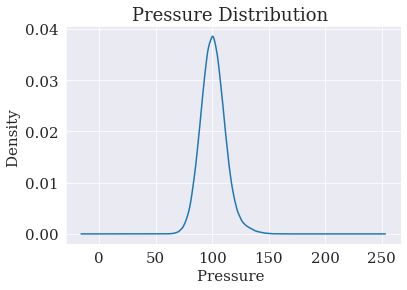

In [29]:
telemetry["pressure"].plot(kind="kde")
plt.title("Pressure Distribution ")
plt.ylabel("Density ")
plt.xlabel("Pressure ")
plt.show()

In [30]:
telemetry.describe() 

,machineID,volt,rotate,pressure,vibration,year,month,day
count,876101.000000,876101.000000,876101.000000,876100.000000,876100.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,170.777762,446.605132,100.858668,40.385007,2015.000799,6.525397,15.718876
std,28.866101,15.509124,52.673857,11.048679,5.370361,0.028255,3.448160,8.797154
min,1.000000,97.333604,138.432075,51.237106,14.877054,2015.000000,1.000000,1.000000
25%,25.000000,160.304961,412.305749,93.498181,36.777299,2015.000000,4.000000,8.000000
50%,50.000000,170.607343,447.558205,100.425559,40.237247,2015.000000,7.000000,16.000000
75%,75.000000,181.004499,482.176586,107.555231,43.784938,2015.000000,10.000000,23.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,2016.000000,12.000000,31.000000


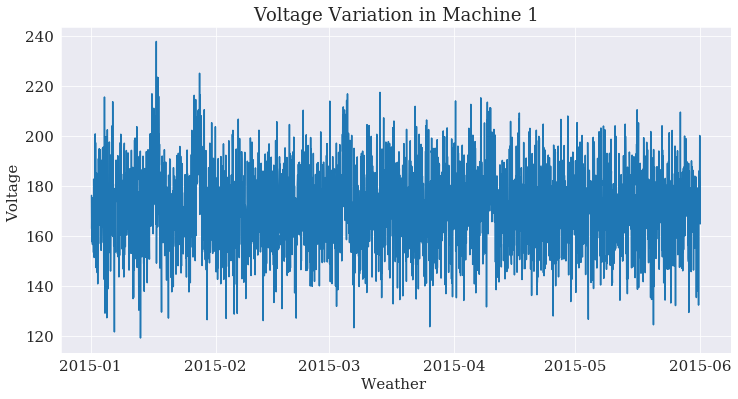

In [31]:
# We show an example graph of the voltage values ​​for machine 1 during the first 6 months of 2015.

plot_df = telemetry.loc[
    (telemetry["machineID"] == 1)
    & (telemetry["datetime"] > pd.to_datetime("2015-01-01"))
    & (telemetry["datetime"] < pd.to_datetime("2015-06-01")), ["datetime", "volt"]
]

plt.figure(figsize=(12, 6))
plt.plot(plot_df["datetime"], plot_df["volt"])
plt.title("Voltage Variation in Machine 1")
plt.ylabel("Voltage ")

# We make labels legible.
adf = plt.gca().get_xaxis().get_major_formatter()
adf.scaled[1.0] = "%m-%d"
plt.xlabel("Weather ")
plt.show()

In [32]:
##ERROR DATA ANALYSIS
errors.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [33]:
errors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3919 entries, 0 to 3918
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3919 non-null   object
 1   machineID  3919 non-null   int64 
 2   errorID    3919 non-null   object
dtypes: int64(1), object(2)
memory usage: 92.0+ KB


In [34]:
# Formatting the date and time field that comes as a string.
# Categories allow comparison between values, automatic ordering, easier graphing and other functions.
# Also less memory (similar to "factor" in R).
errors["datetime"] = pd.to_datetime(errors["datetime"], format="%Y-%m-%d %H:%M:%S")
errors["errorID"] = errors["errorID"].astype("category")
errors['year'] = errors['datetime'].dt.year
errors['month'] = errors['datetime'].dt.month
errors['day'] = errors['datetime'].dt.day

errors.head()

,datetime,machineID,errorID,year,month,day
0,2015-01-03 07:00:00,1,error1,2015,1,3
1,2015-01-03 20:00:00,1,error3,2015,1,3
2,2015-01-04 06:00:00,1,error5,2015,1,4
3,2015-01-10 15:00:00,1,error4,2015,1,10
4,2015-01-22 10:00:00,1,error4,2015,1,22


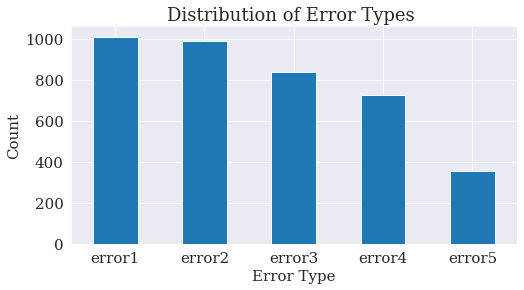

In [35]:
#sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
errors["errorID"].value_counts().plot(kind="bar", rot=0)
plt.title("Distribution of Error Types ")
plt.ylabel("Count")
plt.xlabel("Error Type")
plt.show()

In [36]:
## MAINT DATA ANALYSIS
maint.head()

,datetime,machineID,comp
0,2015-01-02 06:00:00,93,comp17
1,2015-01-02 06:00:00,69,comp15
2,2015-01-02 06:00:00,88,comp14
3,2015-01-02 06:00:00,26,comp21
4,2015-01-02 06:00:00,33,comp23


In [37]:
maint.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5858 entries, 0 to 5857
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   5858 non-null   object
 1   machineID  5858 non-null   int64 
 2   comp       5858 non-null   object
dtypes: int64(1), object(2)
memory usage: 137.4+ KB


In [38]:
# Formatting the date and time field that comes as a string.
maint["datetime"] = pd.to_datetime(maint["datetime"], format="%Y-%m-%d %H:%M:%S")
maint['year'] = maint['datetime'].dt.year
maint['month'] = maint['datetime'].dt.month
maint['day'] = maint['datetime'].dt.day
maint["comp"] = maint["comp"].astype("category")
maint.dtypes

datetime     datetime64[ns]
machineID             int64
comp               category
year                  int64
month                 int64
day                   int64
dtype: object

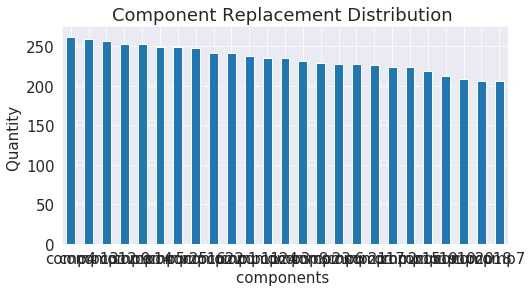

In [39]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 4))
maint["comp"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Replacement Distribution ")
plt.ylabel("Quantity ")
plt.xlabel("components ")
plt.show()

In [40]:
##Machines data analysis
machines.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [41]:
machines.shape
machines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   machineID  100 non-null    int64 
 1   model      100 non-null    object
 2   age        100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [42]:
machines.dtypes

machineID     int64
model        object
age           int64
dtype: object

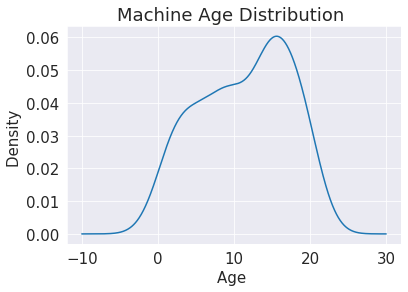

In [43]:
# We check if there are several hills as it can suggest two different groups.
machines["age"].plot(kind="kde")
plt.title("Machine Age Distribution ")
plt.xlabel("Age ")
plt.ylabel("Density ")
plt.show()

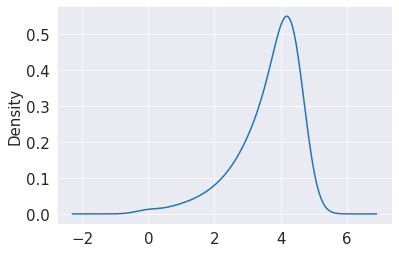

In [44]:
# We apply natural logarithm to normalize.
np.log(machines[machines["age"] != 0].iloc[:, 0]).plot(kind="kde")
plt.show()

In [45]:
machines["model"] = machines["model"].astype("category")
machines.dtypes

machineID       int64
model        category
age             int64
dtype: object

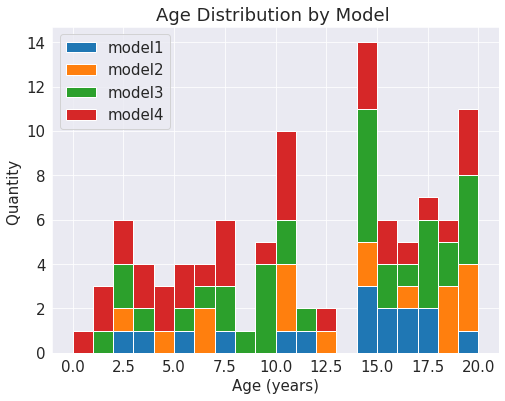

In [46]:
plt.figure(figsize=(8, 6))
_, bins, _ = plt.hist([
    machines.loc[machines["model"] == "model1", "age"],
    machines.loc[machines["model"] == "model2", "age"],
    machines.loc[machines["model"] == "model3", "age"],
    machines.loc[machines["model"] == "model4", "age"]],
    20, stacked=True, label=["model1", "model2", "model3", "model4"
])
plt.title("Age Distribution by Model ")
plt.xlabel("Age (years)")
plt.ylabel("Quantity ")
plt.legend()
plt.show()

In [47]:
## Failures data analysis
failures.head()

,datetime,machineID,failure
0,2015-01-02 06:00:00,95,comp14
1,2015-01-02 06:00:00,81,comp12
2,2015-01-02 06:00:00,79,comp11
3,2015-01-02 06:00:00,3,comp4
4,2015-01-02 06:00:00,80,comp24


In [48]:
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   datetime   3282 non-null   object
 1   machineID  3282 non-null   int64 
 2   failure    3282 non-null   object
dtypes: int64(1), object(2)
memory usage: 77.0+ KB


In [49]:
# We format the datetime that comes as a string
failures["datetime"] = pd.to_datetime(failures["datetime"], format="%Y-%m-%d %H:%M:%S")
failures['year'] = failures['datetime'].dt.year
failures['month'] = failures['datetime'].dt.month
failures['day'] = failures['datetime'].dt.day
failures["failure"] = failures["failure"].astype("category")
failures.dtypes
failures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3282 entries, 0 to 3281
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   datetime   3282 non-null   datetime64[ns]
 1   machineID  3282 non-null   int64         
 2   failure    3282 non-null   category      
 3   year       3282 non-null   int64         
 4   month      3282 non-null   int64         
 5   day        3282 non-null   int64         
dtypes: category(1), datetime64[ns](1), int64(4)
memory usage: 132.4 KB


In [50]:
failures

,datetime,machineID,failure,year,month,day
0,2015-01-02 06:00:00,95,comp14,2015,1,2
1,2015-01-02 06:00:00,81,comp12,2015,1,2
2,2015-01-02 06:00:00,79,comp11,2015,1,2
3,2015-01-02 06:00:00,3,comp4,2015,1,2
4,2015-01-02 06:00:00,80,comp24,2015,1,2
...,...,...,...,...,...,...
3277,2015-12-31 06:00:00,67,comp7,2015,12,31
3278,2015-12-31 06:00:00,41,comp23,2015,12,31
3279,2015-12-31 06:00:00,93,comp23,2015,12,31
3280,2015-12-31 06:00:00,26,comp14,2015,12,31


In [51]:
failures.describe(include="all")

,datetime,machineID,failure,year,month,day
count,3282,3282.000000,3282,3282.0,3282.000000,3282.000000
unique,305,NaN,25,NaN,NaN,NaN
top,2015-01-19 06:00:00,NaN,comp2,NaN,NaN,NaN
freq,20,NaN,160,NaN,NaN,NaN
first,2015-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN
last,2015-12-31 06:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,50.654479,NaN,2015.0,6.468312,15.375381
std,NaN,28.877645,NaN,0.0,3.499954,8.773758
min,NaN,0.000000,NaN,2015.0,1.000000,1.000000
25%,NaN,26.000000,NaN,2015.0,3.000000,7.000000


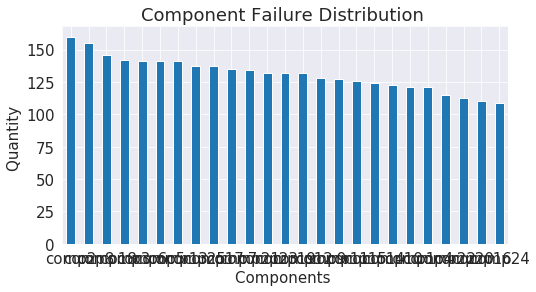

In [52]:
plt.figure(figsize=(8, 4))
failures["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Component Failure Distribution ")
plt.ylabel("Quantity ")
plt.xlabel("Components ")
plt.show()

In [53]:
# We calculate average values ​​for telemetry characteristics
# we pivot because we need the datetime as an index for "resample" to work
# resample creates the lagging
# closed = 'right' => (6:00, 9:00] or 6:00 < x <= 9:00
# closed='left'  => [6:00, 9:00) or 6:00 <= x < 9:00
# it can't be both
# unstack: return df to original format
# we have 100 machines, 4 sensors = 400 columns
# unstack shows a dataseries in the columns as an index and returns series (if there are several indexes they are rearranged).
# Each dataframe in temp has the values ​​of the field that corresponds to it at that moment.

temp = []
fields = ["volt", "rotate", "pressure", "vibration"]
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").mean().unstack()
    for col in fields
]
temp[1].head()

machineID  datetime           
1          2015-01-01 09:00:00    449.533798
           2015-01-01 12:00:00    403.949857
           2015-01-01 15:00:00    435.781707
           2015-01-01 18:00:00    430.472823
           2015-01-01 21:00:00    437.111120
dtype: float64

In [54]:
telemetry

,datetime,machineID,volt,rotate,pressure,vibration,year,month,day
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686,2015,1,1
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973,2015,1,1
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847,2015,1,1
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144,2015,1,1
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511,2015,1,1
...,...,...,...,...,...,...,...,...,...
968584,2016-01-01 02:00:00,100,179.438162,395.222827,102.290715,50.771941,2016,1,1
968585,2016-01-01 03:00:00,100,189.617555,446.207972,98.180607,35.123072,2016,1,1
968586,2016-01-01 04:00:00,100,192.483414,447.816524,94.132837,48.314561,2016,1,1
968587,2016-01-01 05:00:00,100,165.475310,413.771670,104.081073,44.835259,2016,1,1


In [55]:
temp

[machineID  datetime           
 1          2015-01-01 09:00:00    170.028993
            2015-01-01 12:00:00    164.192565
            2015-01-01 15:00:00    168.134445
            2015-01-01 18:00:00    165.514453
            2015-01-01 21:00:00    168.809347
                                      ...    
 100        2015-12-31 21:00:00    166.078945
            2016-01-01 00:00:00    158.327984
            2016-01-01 03:00:00    170.306956
            2016-01-01 06:00:00    182.525427
            2016-01-01 09:00:00    171.336037
 Length: 292100, dtype: float64,
 machineID  datetime           
 1          2015-01-01 09:00:00    449.533798
            2015-01-01 12:00:00    403.949857
            2015-01-01 15:00:00    435.781707
            2015-01-01 18:00:00    430.472823
            2015-01-01 21:00:00    437.111120
                                      ...    
 100        2015-12-31 21:00:00    424.431184
            2016-01-01 00:00:00    504.056262
            2016-01-01 03:00:

In [56]:
telemetry.describe()

,machineID,volt,rotate,pressure,vibration,year,month,day
count,876101.000000,876101.000000,876101.000000,876100.000000,876100.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,170.777762,446.605132,100.858668,40.385007,2015.000799,6.525397,15.718876
std,28.866101,15.509124,52.673857,11.048679,5.370361,0.028255,3.448160,8.797154
min,1.000000,97.333604,138.432075,51.237106,14.877054,2015.000000,1.000000,1.000000
25%,25.000000,160.304961,412.305749,93.498181,36.777299,2015.000000,4.000000,8.000000
50%,50.000000,170.607343,447.558205,100.425559,40.237247,2015.000000,7.000000,16.000000
75%,75.000000,181.004499,482.176586,107.555231,43.784938,2015.000000,10.000000,23.000000
max,100.000000,255.124717,695.020984,185.951998,76.791072,2016.000000,12.000000,31.000000


In [57]:
telemetry_mean_3h = pd.concat(temp, axis=1) # We unite the series.
telemetry_mean_3h.columns = [col + "mean_3h" for col in fields] # We assign column names.
telemetry_mean_3h.reset_index(inplace=True) # We flatten the frame.
telemetry_mean_3h.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
0,1,2015-01-01 09:00:00,170.028993,449.533798,94.592122,40.893502
1,1,2015-01-01 12:00:00,164.192565,403.949857,105.687417,34.255891
2,1,2015-01-01 15:00:00,168.134445,435.781707,107.793709,41.239405
3,1,2015-01-01 18:00:00,165.514453,430.472823,101.703289,40.373739
4,1,2015-01-01 21:00:00,168.809347,437.111120,90.911060,41.738542


In [58]:
telemetry_mean_3h.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h
count,292100.000000,292100.000000,292100.000000,292100.000000,292100.000000
mean,50.500000,170.778609,446.603743,100.858983,40.385180
std,28.866119,9.504636,33.139576,7.416963,3.479687
min,1.000000,125.532506,211.811184,72.118639,26.569635
25%,25.750000,164.449465,427.552297,96.238330,38.147563
50%,50.500000,170.435196,448.380810,100.234420,40.145855
75%,75.250000,176.613713,468.452496,104.407388,42.228094
max,100.000000,241.420717,586.682904,162.309656,69.311324


In [59]:
# We repeat for the standard deviation.
temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).resample("3H", closed="left", label="right").std().unstack()
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00     6.721032
           2015-01-01 12:00:00     7.596570
           2015-01-01 15:00:00    10.124584
           2015-01-01 18:00:00     4.673269
           2015-01-01 21:00:00    14.752132
dtype: float64

In [60]:
telemetry_sd_3h = pd.concat(temp, axis=1)
telemetry_sd_3h.columns = [i + "sd_3h" for i in fields]
telemetry_sd_3h.reset_index(inplace=True)
telemetry_sd_3h.head()

,machineID,datetime,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
0,1,2015-01-01 09:00:00,6.721032,67.849599,18.934956,5.874970
1,1,2015-01-01 12:00:00,7.596570,50.120452,8.555032,7.662229
2,1,2015-01-01 15:00:00,10.124584,55.084734,5.909721,5.169304
3,1,2015-01-01 18:00:00,4.673269,42.047278,4.554047,2.106108
4,1,2015-01-01 21:00:00,14.752132,47.048609,4.244158,2.207884


In [61]:
telemetry_sd_3h.describe()

,machineID,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h
count,292100.000000,292000.000000,292000.000000,292000.000000,292000.000000
mean,50.500000,13.299090,44.456338,8.885976,4.441164
std,28.866119,6.965914,23.216712,4.656211,2.320302
min,1.000000,0.025509,0.078991,0.027417,0.015278
25%,25.750000,8.027455,26.903705,5.370581,2.684790
50%,50.500000,12.495658,41.794719,8.346020,4.173955
75%,75.250000,17.688490,59.104130,11.790303,5.900106
max,100.000000,58.444332,179.903039,35.659369,18.305595


In [62]:
# To capture a longer-term effect, the 24-hour lagging functions are also calculated.
# We create new values ​​with 24-hour averages, and then select the first result every 3 hours.
# In this way we can join the results with the previous lagging characteristics (calculated at 3 hours).

temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).mean().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00           NaN
           2015-01-01 12:00:00           NaN
           2015-01-01 15:00:00           NaN
           2015-01-01 18:00:00           NaN
           2015-01-01 21:00:00           NaN
           2015-01-02 00:00:00           NaN
           2015-01-02 03:00:00           NaN
           2015-01-02 06:00:00    169.733809
           2015-01-02 09:00:00    170.614862
           2015-01-02 12:00:00    169.893965
dtype: float64

In [63]:
telemetry_mean_24h = pd.concat(temp, axis=1)
telemetry_mean_24h.columns = [i + "mean_24h" for i in fields]
telemetry_mean_24h.reset_index(inplace=True)
# Due to the moving average method, the first 23 records are null; you have to eliminate them.
# It does not happen at the end of the frame because rolling stops at the end.
# We end up with a frame of less data than the original telemetry as well as the previous 3H.
telemetry_mean_24h = telemetry_mean_24h.loc[-telemetry_mean_24h["voltmean_24h"].isnull()]
telemetry_mean_24h.head()

,machineID,datetime,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
7,1,2015-01-02 06:00:00,169.733809,445.179865,96.797113,40.385160
8,1,2015-01-02 09:00:00,170.614862,446.364859,96.849785,39.736826
9,1,2015-01-02 12:00:00,169.893965,447.009407,97.715600,39.498374
10,1,2015-01-02 15:00:00,171.243444,444.233563,96.666060,40.229370
11,1,2015-01-02 18:00:00,170.792486,448.440437,95.766838,40.055214


In [64]:
telemetry_mean_24h.describe()

,machineID,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,170.773241,446.612525,100.855093,40.384618
std,28.86612,4.718257,18.075358,4.734948,2.059840
min,1.00000,155.812721,266.010419,91.057429,35.060087
25%,25.75000,168.070900,441.549418,98.668589,39.354137
50%,50.50000,170.211185,449.211690,100.097667,40.072808
75%,75.25000,172.460011,456.368100,101.611121,40.833388
max,100.00000,220.782618,499.096975,152.394833,61.932124


In [65]:
# We repeat for the standard deviation
temp = []
fields = ["volt", "rotate", "pressure", "vibration"]

temp = [
    pd.pivot_table(
        telemetry,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).std().resample("3H", closed="left", label="right").first().unstack(level=-1)
    for col in fields
]
temp[0].head()

machineID  datetime           
1          2015-01-01 09:00:00   NaN
           2015-01-01 12:00:00   NaN
           2015-01-01 15:00:00   NaN
           2015-01-01 18:00:00   NaN
           2015-01-01 21:00:00   NaN
dtype: float64

In [66]:
telemetry_sd_24h = pd.concat(temp, axis=1)
telemetry_sd_24h.columns = [i + "sd_24h" for i in fields]
telemetry_sd_24h.reset_index(inplace=True)
telemetry_sd_24h = telemetry_sd_24h.loc[-telemetry_sd_24h["voltsd_24h"].isnull()]
telemetry_sd_24h.head(10)

,machineID,datetime,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,13.954518,43.490234,8.061653,5.898069
12,1,2015-01-02 21:00:00,14.402740,42.626186,10.408012,5.941890
13,1,2015-01-03 00:00:00,15.513819,40.395881,10.833294,5.737671
14,1,2015-01-03 03:00:00,15.726970,39.648116,11.904700,5.601191
15,1,2015-01-03 06:00:00,15.635083,41.828592,11.326412,5.583521
16,1,2015-01-03 09:00:00,13.995465,40.843882,11.036546,5.561553


In [67]:
telemetry_sd_24h.describe()

,machineID,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,14.918908,49.948358,10.046716,5.002063
std,28.86612,2.260736,7.682014,1.713750,0.799835
min,1.00000,6.380619,18.385248,4.145308,2.144863
25%,25.75000,13.358744,44.669810,8.924362,4.460346
50%,50.50000,14.853948,49.613807,9.921421,4.958585
75%,75.25000,16.394726,54.822037,10.980510,5.484489
max,100.00000,27.664538,103.819404,28.654103,12.325783


In [68]:
# We combine the features created so far.
# We take the values ​​2: 6 to avoid duplicate IDs and dates.
# axis = 0 we move in the direction of the rows, axis = 1, we move in the direction of the columns.
telemetry_feat = pd.concat([
    telemetry_mean_3h,
    telemetry_sd_3h.iloc[:, 2:6],
    telemetry_mean_24h.iloc[:, 2:6],
    telemetry_sd_24h.iloc[:, 2:6]], axis=1).dropna()
telemetry_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
7,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,96.797113,40.385160,11.233120,48.717395,10.079880,5.853209
8,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,96.849785,39.736826,12.519402,48.385076,10.171540,6.163231
9,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,97.715600,39.498374,13.370357,42.432317,9.471669,6.195076
10,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,96.666060,40.229370,13.299281,41.346121,8.731229,5.687944
11,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,95.766838,40.055214,13.954518,43.490234,8.061653,5.898069


In [69]:
telemetry_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,pressuremean_24h,vibrationmean_24h,voltsd_24h,rotatesd_24h,pressuresd_24h,vibrationsd_24h
count,291300.00000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000,291300.000000
mean,50.50000,170.771416,446.612972,100.855301,40.384328,13.299858,44.456335,8.885822,4.440660,170.772579,446.613440,100.854547,40.384564,14.918849,49.947916,10.046687,5.002065
std,28.86612,9.497201,33.122865,7.408854,3.476641,6.966647,23.216421,4.656341,2.320066,4.716970,18.074248,4.733098,2.059861,2.260726,7.682126,1.713726,0.799820
min,1.00000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,266.010419,91.057429,35.060087,6.380619,18.385248,4.145308,2.144863
25%,25.75000,164.445576,427.568132,96.238173,38.147839,8.027455,26.903567,5.370647,2.684308,168.070890,441.549802,98.668589,39.354062,13.358663,44.668824,8.924317,4.460347
50%,50.50000,170.430790,448.385564,100.233139,40.146085,12.495595,41.795700,8.345785,4.173854,170.210913,449.212554,100.097694,40.072752,14.853948,49.613807,9.921407,4.958594
75%,75.25000,176.607051,468.447680,104.404520,42.227392,17.689118,59.103715,11.789645,5.898997,172.459612,456.368008,101.611121,40.833364,16.394764,54.821318,10.980498,5.484480
max,100.00000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,499.096975,152.310351,61.932124,27.664538,103.819404,28.654103,12.325783


In [70]:
##Characteristics Lag in Errors
"""
We start by reformatting the error data to have one input per machine per time
when at least one error occurred.
We create a column for each type of error.
"""
error_count = pd.get_dummies(errors) # We put a 1 if the error appears for that machine, 0 otherwise.
error_count.columns = ["datetime", "machineID","year" ,"month","day","error1", "error2", "error3", "error4", "error5"]
error_count.head(15)

,datetime,machineID,year,month,day,error1,error2,error3,error4,error5
0,2015-01-03 07:00:00,1,2015,1,3,1,0,0,0,0
1,2015-01-03 20:00:00,1,2015,1,3,0,0,1,0,0
2,2015-01-04 06:00:00,1,2015,1,4,0,0,0,0,1
3,2015-01-10 15:00:00,1,2015,1,10,0,0,0,1,0
4,2015-01-22 10:00:00,1,2015,1,22,0,0,0,1,0
5,2015-01-25 15:00:00,1,2015,1,25,0,0,0,1,0
6,2015-01-27 04:00:00,1,2015,1,27,1,0,0,0,0
7,2015-03-03 22:00:00,1,2015,3,3,0,1,0,0,0
8,2015-03-05 06:00:00,1,2015,3,5,1,0,0,0,0
9,2015-03-20 18:00:00,1,2015,3,20,1,0,0,0,0


In [71]:
error_count.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000,3919.000000
mean,51.044654,2015.000510,6.484818,15.518755,0.257719,0.252105,0.213830,0.185507,0.090839
std,28.954988,0.022588,3.465459,8.802008,0.437434,0.434277,0.410061,0.388758,0.287417
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,77.000000,2015.000000,10.000000,23.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
"""
The dates in the dataframe are repeated, so we group by date.
We combine errors for a given machine at a specific time.
We do sum in case there are multiple errors of the same type at the same time, but not expected.
"""
error_count_grouped = error_count.groupby(["machineID", "datetime","year" ,"month","day",]).sum().reset_index()
error_count_grouped.head(5)

,machineID,datetime,year,month,day,error1,error2,error3,error4,error5
0,1,2015-01-03 07:00:00,2015,1,3,1,0,0,0,0
1,1,2015-01-03 20:00:00,2015,1,3,0,0,1,0,0
2,1,2015-01-04 06:00:00,2015,1,4,0,0,0,0,1
3,1,2015-01-10 15:00:00,2015,1,10,0,0,0,1,0
4,1,2015-01-22 10:00:00,2015,1,22,0,0,0,1,0


In [73]:
error_count_grouped.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.00000,3616.000000,3616.000000,3616.000000
mean,51.119192,2015.000553,6.481748,15.430310,0.279314,0.27323,0.231748,0.201051,0.098451
std,28.870118,0.023515,3.463175,8.800768,0.448724,0.44568,0.422007,0.400841,0.297965
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,26.000000,2015.000000,3.000000,8.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,52.000000,2015.000000,7.000000,15.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,76.000000,2015.000000,10.000000,23.000000,1.000000,1.00000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [74]:
"""
We check that the registered errors exist in the available machines filled with 0
the non-matches so we only search for a match with datetime and machineID.
"""
error_count_filtered = telemetry[["datetime", "machineID","year" ,"month","day",]].merge(
    error_count_grouped,
    on=["machineID", "datetime","year" ,"month","day",],
    how="left"
).fillna(0.0)

error_count_filtered.sample(50)

,datetime,machineID,year,month,day,error1,error2,error3,error4,error5
2478,2015-04-14 12:00:00,1,2015,4,14,0.0,0.0,0.0,0.0,0.0
723504,2015-08-01 19:00:00,83,2015,8,1,0.0,0.0,0.0,0.0,0.0
799319,2015-03-28 09:00:00,92,2015,3,28,0.0,0.0,0.0,0.0,0.0
115413,2015-03-05 13:00:00,14,2015,3,5,0.0,0.0,0.0,0.0,0.0
84254,2015-08-14 11:00:00,10,2015,8,14,0.0,0.0,0.0,0.0,0.0
30468,2015-06-24 15:00:00,4,2015,6,24,0.0,0.0,0.0,0.0,0.0
392889,2015-11-05 18:00:00,45,2015,11,5,0.0,0.0,0.0,0.0,0.0
426923,2015-09-24 16:00:00,49,2015,9,24,0.0,0.0,0.0,0.0,0.0
845126,2015-06-19 19:00:00,97,2015,6,19,0.0,0.0,0.0,0.0,0.0
204176,2015-04-22 14:00:00,24,2015,4,22,0.0,0.0,0.0,0.0,0.0


In [75]:
error_count_filtered.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,2015.000799,6.525397,15.718876,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866101,0.028255,3.448160,8.797154,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,2015.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
# We check that there are no anomalies.
error_count_filtered.describe()

,machineID,year,month,day,error1,error2,error3,error4,error5
count,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000,876101.000000
mean,50.499955,2015.000799,6.525397,15.718876,0.001153,0.001128,0.000957,0.000830,0.000406
std,28.866101,0.028255,3.448160,8.797154,0.033934,0.033563,0.030913,0.028795,0.020154
min,1.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,2015.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
# We calculate the total number of errors for each type of error during 24-hour periods. 
# We will take points every 3 hours.

temp = []
fields = [
    "error%d" % i
    for i in range(1,6)
]

temp = [
    pd.pivot_table(
        error_count_filtered,
        index="datetime",
        columns="machineID",
        values=col).rolling(window=24).sum().resample("3H", closed="left", label="right").first().unstack()
    for col in fields
]
temp[0].head(10)

machineID  datetime           
1          2015-01-01 09:00:00    NaN
           2015-01-01 12:00:00    NaN
           2015-01-01 15:00:00    NaN
           2015-01-01 18:00:00    NaN
           2015-01-01 21:00:00    NaN
           2015-01-02 00:00:00    NaN
           2015-01-02 03:00:00    NaN
           2015-01-02 06:00:00    0.0
           2015-01-02 09:00:00    0.0
           2015-01-02 12:00:00    0.0
dtype: float64

In [78]:
error_count_total = pd.concat(temp, axis=1)
error_count_total.columns = [i + "count" for i in fields]
error_count_total.reset_index(inplace=True)
error_count_total = error_count_total.dropna()
error_count_total.head()

,machineID,datetime,error1count,error2count,error3count,error4count,error5count
7,1,2015-01-02 06:00:00,0.0,0.0,0.0,0.0,0.0
8,1,2015-01-02 09:00:00,0.0,0.0,0.0,0.0,0.0
9,1,2015-01-02 12:00:00,0.0,0.0,0.0,0.0,0.0
10,1,2015-01-02 15:00:00,0.0,0.0,0.0,0.0,0.0
11,1,2015-01-02 18:00:00,0.0,0.0,0.0,0.0,0.0


In [79]:
error_count_total["error5count"].unique()

array([0., 1., 2.])

In [80]:
error_count_total.describe()

,machineID,error1count,error2count,error3count,error4count,error5count
count,291400.00000,291400.000000,291400.000000,291400.000000,291400.000000,291400.000000
mean,50.50000,0.027649,0.027069,0.022907,0.019904,0.009753
std,28.86612,0.166273,0.164429,0.151453,0.140820,0.098797
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.75000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.50000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,75.25000,0.000000,0.000000,0.000000,0.000000,0.000000
max,100.00000,2.000000,2.000000,2.000000,2.000000,2.000000


In [81]:
#Time since Last Maintenance Replacement
maint.head()

,datetime,machineID,comp,year,month,day
0,2015-01-02 06:00:00,93,comp17,2015,1,2
1,2015-01-02 06:00:00,69,comp15,2015,1,2
2,2015-01-02 06:00:00,88,comp14,2015,1,2
3,2015-01-02 06:00:00,26,comp21,2015,1,2
4,2015-01-02 06:00:00,33,comp23,2015,1,2


In [82]:
# we create a column for each type of error
comp_rep = pd.get_dummies(maint)
comp_rep.columns = ["datetime", "machineID","year" ,"month","day",    "comp1",
"comp2",
"comp3",
"comp4",
"comp5",
"comp6",
"comp7",
"comp8",
"comp9",
"comp10",
"comp11",
"comp12",
"comp13",
"comp14",
"comp15",
"comp16",
"comp17",
"comp18",
"comp19",
"comp20",
"comp21",
"comp22",
"comp23",
"comp24",
"comp25"]
comp_rep.head()

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4,comp5,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
0,2015-01-02 06:00:00,93,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2015-01-02 06:00:00,69,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2015-01-02 06:00:00,88,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2015-01-02 06:00:00,26,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2015-01-02 06:00:00,33,2015,1,2,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [83]:
#   **************************************************         #
# If we don't group by date we can see another perspective.
# We find which components fail together, since we group by date.
comp_rep = comp_rep.groupby(["machineID", "datetime","year" ,"month","day",]).sum().reset_index()
comp_rep.head()

,machineID,datetime,year,month,day,comp1,comp2,comp3,comp4,comp5,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
0,0,2015-01-14 06:00:00,2015,1,14,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,2015-01-18 06:00:00,2015,1,18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,2015-01-22 06:00:00,2015,1,22,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,2015-01-31 06:00:00,2015,1,31,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2015-02-02 06:00:00,2015,2,2,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# you have to add the times where there were no replacements
comp_rep = telemetry[["datetime", "machineID","year" ,"month","day"]].merge(
    comp_rep,
    on=["datetime", "machineID","year" ,"month","day"],
    how="outer").fillna(0).sort_values(by=["machineID", "datetime","year" ,"month","day"]
)
comp_rep.head()

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4,comp5,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
876101,2015-01-14 06:00:00,0,2015,1,14,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
876102,2015-01-18 06:00:00,0,2015,1,18,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
876103,2015-01-22 06:00:00,0,2015,1,22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
876104,2015-01-31 06:00:00,0,2015,1,31,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
876105,2015-02-02 06:00:00,0,2015,2,2,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
comp_rep.describe()

,machineID,year,month,day,comp1,comp2,comp3,comp4,comp5,comp6,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
count,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,...,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.000000,876149.00000,876149.000000,876149.000000,876149.000000
mean,50.497188,2015.000799,6.525409,15.718866,0.000275,0.000242,0.000272,0.000292,0.000296,0.000289,...,0.000261,0.000268,0.000284,0.000268,0.000299,0.000284,0.00026,0.000235,0.000264,0.000289
std,28.867730,0.028254,3.448164,8.797197,0.016652,0.015627,0.016548,0.017158,0.017323,0.017191,...,0.016235,0.016375,0.016923,0.016445,0.017356,0.016856,0.01627,0.015332,0.016305,0.017124
min,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,25.000000,2015.000000,4.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,50.000000,2015.000000,7.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,75.000000,2015.000000,10.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,100.000000,2016.000000,12.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.00000,1.000000,2.000000,2.000000


In [86]:
components = ["comp1",
"comp2",
"comp3",
"comp4",
"comp5",
"comp6",
"comp7",
"comp8",
"comp9",
"comp10",
"comp11",
"comp12",
"comp13",
"comp14",
"comp15",
"comp16",
"comp17",
"comp18",
"comp19",
"comp20",
"comp21",
"comp22",
"comp23",
"comp24",
"comp25"]
for comp in components:
    # We want to get the date of the most recent component change.
    comp_rep.loc[comp_rep[comp] < 1, comp] = None # We fill the samples with null without replacement.
    # the dates of the entries that do have replacements.
    comp_rep.loc[-comp_rep[comp].isnull(), comp] = comp_rep.loc[-comp_rep[comp].isnull(), "datetime"]
    # We do a forward-fill of the most recent dates of a component change.
    # We fill with the last valid value found top-bottom.
    comp_rep[comp] = pd.to_datetime(comp_rep[comp].fillna(method="ffill"))

# We eliminated samples from 2014, they could have null, the maintenance began that year.
comp_rep = comp_rep.loc[comp_rep["datetime"] > pd.to_datetime("2015-01-01")]
comp_rep.head(5)

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4,comp5,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
876101,2015-01-14 06:00:00,0,2015,1,14,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-14 06:00:00,NaT
876102,2015-01-18 06:00:00,0,2015,1,18,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-14 06:00:00,2015-01-18 06:00:00
876103,2015-01-22 06:00:00,0,2015,1,22,NaT,NaT,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-22 06:00:00,2015-01-14 06:00:00,2015-01-18 06:00:00
876104,2015-01-31 06:00:00,0,2015,1,31,NaT,2015-01-31 06:00:00,NaT,NaT,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-22 06:00:00,2015-01-14 06:00:00,2015-01-18 06:00:00
876105,2015-02-02 06:00:00,0,2015,2,2,NaT,2015-01-31 06:00:00,NaT,2015-02-02 06:00:00,NaT,...,NaT,NaT,NaT,NaT,NaT,NaT,NaT,2015-01-22 06:00:00,2015-01-14 06:00:00,2015-01-18 06:00:00


In [ ]:
pd.set_option('display.max_columns', 5000)

In [87]:
# We replace the most recent dates of changes by the number of days since the most recent change.
for comp in components: comp_rep[comp] = (comp_rep["datetime"] - pd.to_datetime(comp_rep[comp])) / np.timedelta64(1, "D")
comp_rep.head()

,datetime,machineID,year,month,day,comp1,comp2,comp3,comp4,comp5,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
876101,2015-01-14 06:00:00,0,2015,1,14,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
876102,2015-01-18 06:00:00,0,2015,1,18,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,0.0
876103,2015-01-22 06:00:00,0,2015,1,22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,8.0,4.0
876104,2015-01-31 06:00:00,0,2015,1,31,NaN,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,17.0,13.0
876105,2015-02-02 06:00:00,0,2015,2,2,NaN,2.0,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,19.0,15.0


In [88]:
comp_rep.describe()

,machineID,year,month,day,comp1,comp2,comp3,comp4,comp5,comp6,...,comp16,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25
count,876149.000000,876149.000000,876149.000000,876149.000000,876141.000000,876146.000000,876140.000000,876145.000000,876136.000000,876105.000000,...,876125.000000,876138.000000,874181.000000,876142.000000,876143.000000,876109.000000,876127.000000,876147.000000,876149.000000,876148.000000
mean,50.497188,2015.000799,6.525409,15.718866,9.019439,-9.066184,4.632188,-5.949516,15.663132,12.770798,...,-2.035444,1.450384,-0.530715,-3.149231,-13.307681,4.836015,-4.238805,-11.234856,6.556099,-0.161310
std,28.867730,0.028254,3.448164,8.797197,141.814050,137.039164,140.468914,140.788512,134.097463,144.426787,...,143.786073,141.135493,141.332149,135.880965,147.439636,144.585621,141.116750,141.069507,140.259885,147.911819
min,0.000000,2015.000000,1.000000,1.000000,-364.000000,-364.000000,-364.000000,-359.000000,-362.000000,-361.000000,...,-364.000000,-364.000000,-364.000000,-364.000000,-364.000000,-363.000000,-364.000000,-361.000000,-363.000000,-364.000000
25%,25.000000,2015.000000,4.000000,8.000000,-54.541667,-109.541667,-71.291667,-84.666667,0.125000,-46.708333,...,-88.583333,-75.000000,-78.750000,-85.000000,-119.375000,-72.166667,-92.583333,-118.208333,-58.083333,-79.666667
50%,50.000000,2015.000000,7.000000,16.000000,31.875000,21.666667,31.666667,28.791667,38.333333,36.166667,...,25.166667,29.041667,29.291667,26.291667,21.958333,30.916667,24.375000,21.000000,33.250000,29.208333
75%,75.000000,2015.000000,10.000000,23.000000,93.208333,80.833333,91.750000,81.333333,93.416667,100.083333,...,87.625000,89.916667,86.875000,83.500000,79.416667,92.000000,84.291667,80.625000,93.125000,95.458333
max,100.000000,2016.000000,12.000000,31.000000,360.000000,360.000000,343.000000,353.000000,357.000000,364.000000,...,353.000000,359.000000,336.000000,336.000000,355.000000,350.000000,340.000000,362.000000,356.000000,342.000000


In [89]:
# Finally we unite all the created features.
final_feat = telemetry_feat.merge(error_count_total, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(comp_rep, on=["datetime", "machineID"], how="left")
final_feat = final_feat.merge(machines, on=["machineID"], how="left")
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,NaN,-276.000,-288.000,-329.000,-274.000,-290.000,-331.000,-355.000,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,NaN,-275.875,-287.875,-328.875,-273.875,-289.875,-330.875,-354.875,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,NaN,-275.750,-287.750,-328.750,-273.750,-289.750,-330.750,-354.750,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,NaN,-275.625,-287.625,-328.625,-273.625,-289.625,-330.625,-354.625,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,NaN,-275.500,-287.500,-328.500,-273.500,-289.500,-330.500,-354.500,model3,18


In [90]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25,age
count,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,...,291301.000000,290669.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.00000,291301.000000,291301.000000,291301.000000
mean,50.499864,170.771394,446.613066,100.855286,40.384342,13.299867,44.456424,8.885835,4.440654,170.772573,...,2.108387,0.154570,-2.484948,-12.633584,5.509546,-3.599036,-10.61538,7.244161,0.532505,11.329982
std,28.866163,9.497192,33.122847,7.408845,3.476644,6.966637,23.216431,4.656338,2.320064,4.716963,...,140.642612,140.807473,135.372220,146.966661,144.090460,140.676434,140.67287,139.716581,147.394513,5.827624
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,...,-363.000000,-363.000000,-363.000000,-363.000000,-362.000000,-363.000000,-360.00000,-362.000000,-363.000000,0.000000
25%,25.000000,164.445562,427.568156,96.238201,38.147840,8.027467,26.903641,5.370667,2.684308,168.070895,...,-73.000000,-76.250000,-83.250000,-117.750000,-69.875000,-90.875000,-116.87500,-55.750000,-77.250000,6.000000
50%,50.000000,170.430774,448.385763,100.233057,40.146107,12.495649,41.795769,8.345801,4.173819,170.210887,...,29.250000,29.500000,26.500000,22.125000,31.125000,24.625000,21.25000,33.500000,29.500000,12.000000
75%,75.000000,176.607050,468.448273,104.404514,42.227402,17.689111,59.104053,11.789674,5.898988,172.459607,...,90.125000,87.125000,83.625000,79.625000,92.250000,84.500000,80.87500,93.375000,95.625000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,...,359.000000,336.000000,336.000000,355.000000,350.000000,340.000000,362.00000,356.000000,342.000000,20.000000


In [91]:
"""Label Construction (Target / Dependent Variable)
When multi-class classification is used to predict failures due to a problem, labeling is done by taking a window of time before an asset fails and labeling feature records that fall into that window as "about to fail due to to a problem "while labeling all other records as" normal ". 
This time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others it may take days or weeks in advance."""

'Label Construction (Target / Dependent Variable)\nWhen multi-class classification is used to predict failures due to a problem, labeling is done by taking a window of time before an asset fails and labeling feature records that fall into that window as "about to fail due to to a problem "while labeling all other records as" normal ". \nThis time window should be selected according to the business rule: in some situations it may be sufficient to predict failures hours in advance, while in others it may take days or weeks in advance.'

In [92]:
final_feat.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25,age
count,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.000000,...,291301.000000,290669.000000,291301.000000,291301.000000,291301.000000,291301.000000,291301.00000,291301.000000,291301.000000,291301.000000
mean,50.499864,170.771394,446.613066,100.855286,40.384342,13.299867,44.456424,8.885835,4.440654,170.772573,...,2.108387,0.154570,-2.484948,-12.633584,5.509546,-3.599036,-10.61538,7.244161,0.532505,11.329982
std,28.866163,9.497192,33.122847,7.408845,3.476644,6.966637,23.216431,4.656338,2.320064,4.716963,...,140.642612,140.807473,135.372220,146.966661,144.090460,140.676434,140.67287,139.716581,147.394513,5.827624
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,...,-363.000000,-363.000000,-363.000000,-363.000000,-362.000000,-363.000000,-360.00000,-362.000000,-363.000000,0.000000
25%,25.000000,164.445562,427.568156,96.238201,38.147840,8.027467,26.903641,5.370667,2.684308,168.070895,...,-73.000000,-76.250000,-83.250000,-117.750000,-69.875000,-90.875000,-116.87500,-55.750000,-77.250000,6.000000
50%,50.000000,170.430774,448.385763,100.233057,40.146107,12.495649,41.795769,8.345801,4.173819,170.210887,...,29.250000,29.500000,26.500000,22.125000,31.125000,24.625000,21.25000,33.500000,29.500000,12.000000
75%,75.000000,176.607050,468.448273,104.404514,42.227402,17.689111,59.104053,11.789674,5.898988,172.459607,...,90.125000,87.125000,83.625000,79.625000,92.250000,84.500000,80.87500,93.375000,95.625000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,...,359.000000,336.000000,336.000000,355.000000,350.000000,340.000000,362.00000,356.000000,342.000000,20.000000


In [93]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,NaN,-276.000,-288.000,-329.000,-274.000,-290.000,-331.000,-355.000,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,NaN,-275.875,-287.875,-328.875,-273.875,-289.875,-330.875,-354.875,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,NaN,-275.750,-287.750,-328.750,-273.750,-289.750,-330.750,-354.750,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,NaN,-275.625,-287.625,-328.625,-273.625,-289.625,-330.625,-354.625,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,NaN,-275.500,-287.500,-328.500,-273.500,-289.500,-330.500,-354.500,model3,18


In [94]:
"""The objective is to calculate the probability that a machine will fail in the next 24 hours due 
to a certain component failure
Next, a categorical failure characteristic is created to serve as a label. 
All records within a 24-hour window before a component 1 failure has an error = comp1, 
and so on for components 2, 3, and 4; 
All logs that are not within 24 hours of a component failure have failure = none"""

'The objective is to calculate the probability that a machine will fail in the next 24 hours due \nto a certain component failure\nNext, a categorical failure characteristic is created to serve as a label. \nAll records within a 24-hour window before a component 1 failure has an error = comp1, \nand so on for components 2, 3, and 4; \nAll logs that are not within 24 hours of a component failure have failure = none'

In [95]:
final_feat.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25,model,age
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,NaN,-276.000,-288.000,-329.000,-274.000,-290.000,-331.000,-355.000,model3,18
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,NaN,-275.875,-287.875,-328.875,-273.875,-289.875,-330.875,-354.875,model3,18
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,NaN,-275.750,-287.750,-328.750,-273.750,-289.750,-330.750,-354.750,model3,18
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,NaN,-275.625,-287.625,-328.625,-273.625,-289.625,-330.625,-354.625,model3,18
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,NaN,-275.500,-287.500,-328.500,-273.500,-289.500,-330.500,-354.500,model3,18


In [96]:
"""
We are telling the model that any values ​​similar to those within the 24 hour window
it is a failure of that component, that is why machines repeat themselves.
We use limit = 7 because we have 3 hour separations; 8 * 3 = 24 hours
but we take into account the first non-null value, so it is 7.
"""
labeled_features = final_feat.merge(failures, on=["datetime", "machineID","year" ,"month","day"], how="left")
# We apply a backward-fill of up to 24 hours.
# fillna doesn't work with categorical types at the moment (how would the new category fit in? maybe).
# We pass to object or string, apply the operation, and return to category.
labeled_features["failure"] = labeled_features["failure"].astype(object).fillna(method="bfill", limit=7)
labeled_features["failure"] = labeled_features["failure"].fillna("none")
labeled_features["failure"] = labeled_features["failure"].astype("category")
labeled_features.head(10)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp19,comp20,comp21,comp22,comp23,comp24,comp25,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,-276.000,-288.000,-329.000,-274.000,-290.000,-331.000,-355.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,-275.875,-287.875,-328.875,-273.875,-289.875,-330.875,-354.875,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,-275.750,-287.750,-328.750,-273.750,-289.750,-330.750,-354.750,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,-275.625,-287.625,-328.625,-273.625,-289.625,-330.625,-354.625,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,-275.500,-287.500,-328.500,-273.500,-289.500,-330.500,-354.500,model3,18,none
5,1,2015-01-02 21:00:00,163.278466,446.493166,104.387585,38.068116,21.580492,41.380958,20.725597,6.932127,...,-275.375,-287.375,-328.375,-273.375,-289.375,-330.375,-354.375,model3,18,none
6,1,2015-01-03 00:00:00,172.191198,434.214692,93.747282,39.716482,16.369836,14.636041,18.817326,3.426997,...,-275.250,-287.250,-328.250,-273.250,-289.250,-330.250,-354.250,model3,18,none
7,1,2015-01-03 03:00:00,175.210027,504.845430,108.512153,37.763933,5.991921,16.062702,6.382608,3.449468,...,-275.125,-287.125,-328.125,-273.125,-289.125,-330.125,-354.125,model3,18,none
8,1,2015-01-03 06:00:00,181.690108,472.783187,93.395164,38.621099,11.514450,47.880443,2.177029,7.670520,...,-275.000,-287.000,-328.000,-273.000,-289.000,-330.000,-354.000,model3,18,none
9,1,2015-01-03 09:00:00,172.382935,505.141261,98.524373,49.965572,7.065150,56.849540,5.230039,2.687565,...,-274.875,-286.875,-327.875,-272.875,-288.875,-329.875,-353.875,model3,18,none


In [97]:
labeled_features.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,comp17,comp18,comp19,comp20,comp21,comp22,comp23,comp24,comp25,age
count,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,...,291468.000000,290836.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000
mean,50.502011,170.772453,446.613922,100.855142,40.384362,13.300089,44.456278,8.886195,4.440650,170.772807,...,2.099912,0.144177,-2.495477,-12.632120,5.498749,-3.603935,-10.620795,7.235924,0.535054,11.329601
std,28.865137,9.498912,33.123808,7.409635,3.476859,6.966287,23.216802,4.656445,2.320006,4.717417,...,140.649748,140.811657,135.378031,146.971758,144.100986,140.680058,140.673560,139.722223,147.393737,5.827878
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,...,-363.000000,-363.000000,-363.000000,-363.000000,-362.000000,-363.000000,-360.000000,-362.000000,-363.000000,0.000000
25%,26.000000,164.445576,427.568779,96.238173,38.147796,8.028342,26.903705,5.371009,2.684308,168.071051,...,-73.125000,-76.250000,-83.250000,-117.750000,-70.000000,-90.875000,-116.875000,-55.781250,-77.250000,6.000000
50%,51.000000,170.431581,448.385986,100.232927,40.145943,12.496188,41.795567,8.346103,4.173936,170.210980,...,29.250000,29.500000,26.500000,22.125000,31.125000,24.625000,21.250000,33.500000,29.500000,12.000000
75%,75.000000,176.608796,468.449328,104.404278,42.227435,17.689176,59.103463,11.790265,5.898997,172.459573,...,90.125000,87.031250,83.625000,79.625000,92.125000,84.500000,80.875000,93.375000,95.625000,16.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,...,359.000000,336.000000,336.000000,355.000000,350.000000,340.000000,362.000000,356.000000,342.000000,20.000000


In [98]:
labeled_features.to_csv('labeled_feature24_mock.csv', sep='\t')

In [99]:
########################
labeled_features.loc[labeled_features['failure'] != 'none'].head(50)

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp19,comp20,comp21,comp22,comp23,comp24,comp25,model,age,failure
105,1,2015-01-15 09:00:00,175.439278,472.036642,101.207752,32.260186,22.325757,64.072486,8.788862,5.968326,...,-262.875,-274.875,-315.875,0.125,-276.875,-317.875,-341.875,model3,18,comp14
106,1,2015-01-15 12:00:00,171.866201,464.057129,108.594212,41.245530,4.862445,33.355194,15.542433,1.880587,...,-262.750,-274.750,-315.750,0.250,-276.750,-317.750,-341.750,model3,18,comp14
107,1,2015-01-15 15:00:00,159.696656,451.844211,97.253126,39.778314,11.446515,49.800529,11.898335,4.083968,...,-262.625,-274.625,-315.625,0.375,-276.625,-317.625,-341.625,model3,18,comp14
108,1,2015-01-15 18:00:00,176.333704,506.903378,84.973299,41.025310,13.769002,46.189840,14.144290,7.189973,...,-262.500,-274.500,-315.500,0.500,-276.500,-317.500,-341.500,model3,18,comp14
109,1,2015-01-15 21:00:00,183.752096,482.859242,101.718389,44.236907,14.885392,33.795151,11.147950,4.164700,...,-262.375,-274.375,-315.375,0.625,-276.375,-317.375,-341.375,model3,18,comp14
110,1,2015-01-16 00:00:00,181.858864,493.270514,102.142023,42.047551,15.562928,60.776554,3.445871,2.742416,...,-262.250,-274.250,-315.250,0.750,-276.250,-317.250,-341.250,model3,18,comp14
111,1,2015-01-16 03:00:00,176.521759,441.969963,102.058221,41.915809,7.495152,57.154521,4.864635,4.430744,...,-262.125,-274.125,-315.125,0.875,-276.125,-317.125,-341.125,model3,18,comp14
112,1,2015-01-16 06:00:00,192.233381,451.981881,102.512090,43.614645,22.820333,59.246161,8.549431,9.233098,...,-262.000,-274.000,-315.000,1.000,-276.000,-317.000,-341.000,model3,18,comp14
233,1,2015-01-31 09:00:00,163.960822,413.727963,95.807184,41.492087,17.139600,38.023272,23.408032,3.511999,...,-246.875,-258.875,-299.875,5.125,-260.875,-301.875,-325.875,model3,18,comp3
234,1,2015-01-31 12:00:00,186.159299,464.777292,91.790683,42.121389,5.641081,57.030132,4.808056,1.560701,...,-246.750,-258.750,-299.750,5.250,-260.750,-301.750,-325.750,model3,18,comp3


In [100]:
labeled_features.loc[labeled_features['failure'] == 'none']

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp19,comp20,comp21,comp22,comp23,comp24,comp25,model,age,failure
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,-276.000,-288.000,-329.000,-274.000,-290.000,-331.000,-355.000,model3,18,none
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,-275.875,-287.875,-328.875,-273.875,-289.875,-330.875,-354.875,model3,18,none
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,-275.750,-287.750,-328.750,-273.750,-289.750,-330.750,-354.750,model3,18,none
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,-275.625,-287.625,-328.625,-273.625,-289.625,-330.625,-354.625,model3,18,none
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,-275.500,-287.500,-328.500,-273.500,-289.500,-330.500,-354.500,model3,18,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
291463,100,2015-12-31 18:00:00,177.758754,458.391629,103.183160,46.846592,13.147011,75.100940,3.111700,3.576693,...,119.500,57.500,3.500,255.500,116.500,8.500,261.500,model4,5,none
291464,100,2015-12-31 21:00:00,166.078945,424.431184,98.344409,30.907459,29.351231,69.348245,16.940674,3.731256,...,119.625,57.625,3.625,255.625,116.625,8.625,261.625,model4,5,none
291465,100,2016-01-01 00:00:00,158.327984,504.056262,108.055441,40.109705,9.605817,78.036116,9.154932,3.379639,...,119.750,57.750,3.750,255.750,116.750,8.750,261.750,model4,5,none
291466,100,2016-01-01 03:00:00,170.306956,438.653616,102.346227,47.481232,8.457322,43.021553,0.785721,3.198928,...,119.875,57.875,3.875,255.875,116.875,8.875,261.875,model4,5,none


In [101]:
model_dummies = pd.get_dummies(labeled_features["model"])
labeled_features = pd.concat([labeled_features, model_dummies], axis=1)
labeled_features.drop("model", axis=1, inplace=True)
labeled_features.head()

,machineID,datetime,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,...,comp22,comp23,comp24,comp25,age,failure,model1,model2,model3,model4
0,1,2015-01-02 06:00:00,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,...,-274.000,-290.000,-331.000,-355.000,18,none,0,0,1,0
1,1,2015-01-02 09:00:00,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,...,-273.875,-289.875,-330.875,-354.875,18,none,0,0,1,0
2,1,2015-01-02 12:00:00,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,...,-273.750,-289.750,-330.750,-354.750,18,none,0,0,1,0
3,1,2015-01-02 15:00:00,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,...,-273.625,-289.625,-330.625,-354.625,18,none,0,0,1,0
4,1,2015-01-02 18:00:00,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,...,-273.500,-289.500,-330.500,-354.500,18,none,0,0,1,0


In [102]:
labeled_features.describe()

,machineID,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,...,comp21,comp22,comp23,comp24,comp25,age,model1,model2,model3,model4
count,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,...,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000,291468.000000
mean,50.502011,170.772453,446.613922,100.855142,40.384362,13.300089,44.456278,8.886195,4.440650,170.772807,...,5.498749,-3.603935,-10.620795,7.235924,0.535054,11.329601,0.159990,0.170002,0.350018,0.319991
std,28.865137,9.498912,33.123808,7.409635,3.476859,6.966287,23.216802,4.656445,2.320006,4.717417,...,144.100986,140.680058,140.673560,139.722223,147.393737,5.827878,0.366598,0.375635,0.476976,0.466473
min,1.000000,125.532506,211.811184,72.118639,26.569635,0.025509,0.078991,0.027417,0.015278,155.812721,...,-362.000000,-363.000000,-360.000000,-362.000000,-363.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,26.000000,164.445576,427.568779,96.238173,38.147796,8.028342,26.903705,5.371009,2.684308,168.071051,...,-70.000000,-90.875000,-116.875000,-55.781250,-77.250000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,170.431581,448.385986,100.232927,40.145943,12.496188,41.795567,8.346103,4.173936,170.210980,...,31.125000,24.625000,21.250000,33.500000,29.500000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,75.000000,176.608796,468.449328,104.404278,42.227435,17.689176,59.103463,11.790265,5.898997,172.459573,...,92.125000,84.500000,80.875000,93.375000,95.625000,16.000000,0.000000,0.000000,1.000000,1.000000
max,100.000000,241.420717,586.682904,162.309656,69.311324,58.444332,179.903039,35.659369,18.305595,220.782618,...,350.000000,340.000000,362.000000,356.000000,342.000000,20.000000,1.000000,1.000000,1.000000,1.000000


In [103]:
# labeled_features.to_csv('labeled_feature24.csv', sep='\t')

In [104]:
labeled_features.columns

Index(['machineID', 'datetime', 'voltmean_3h', 'rotatemean_3h',
       'pressuremean_3h', 'vibrationmean_3h', 'voltsd_3h', 'rotatesd_3h',
       'pressuresd_3h', 'vibrationsd_3h', 'voltmean_24h', 'rotatemean_24h',
       'pressuremean_24h', 'vibrationmean_24h', 'voltsd_24h', 'rotatesd_24h',
       'pressuresd_24h', 'vibrationsd_24h', 'error1count', 'error2count',
       'error3count', 'error4count', 'error5count', 'year', 'month', 'day',
       'comp1', 'comp2', 'comp3', 'comp4', 'comp5', 'comp6', 'comp7', 'comp8',
       'comp9', 'comp10', 'comp11', 'comp12', 'comp13', 'comp14', 'comp15',
       'comp16', 'comp17', 'comp18', 'comp19', 'comp20', 'comp21', 'comp22',
       'comp23', 'comp24', 'comp25', 'age', 'failure', 'model1', 'model2',
       'model3', 'model4'],
      dtype='object')

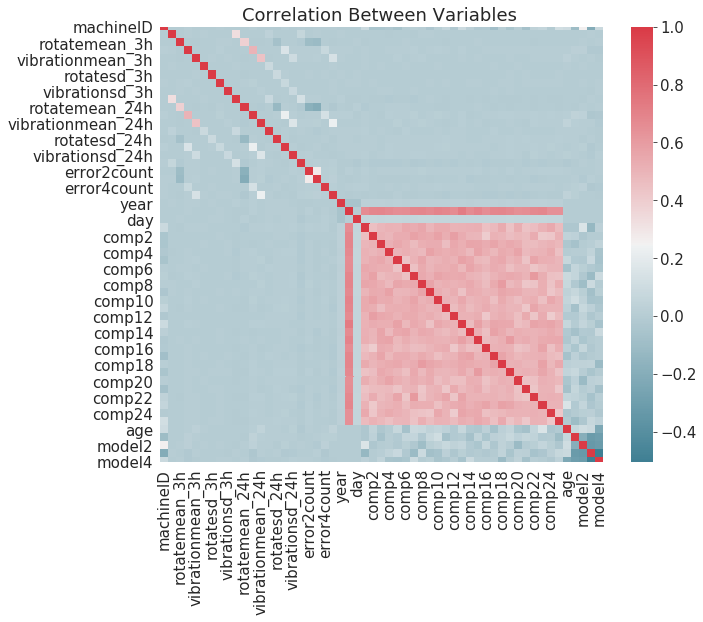

In [105]:
### Correlation Analysis
# It is necessary to eliminate the variables with high correlation (only one), consider> 70%.
f, ax = plt.subplots(figsize=(10, 8))
corr = labeled_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.title("Correlation Between Variables ")
plt.show()

In [106]:
# We save to apply hyper-parameter optimization.
#labeled_features.to_pickle("final_datset.pickle")

In [107]:
# We establish the times corresponding to the records that will be used for training and tests.
import pandas as pd
threshold_dates = [
    pd.to_datetime("2015-09-30 01:00:00"), pd.to_datetime("2015-10-01 01:00:00")
]

In [108]:
test_results = []
models = []
total = len(threshold_dates)

In [109]:
# We make the partition of separate dates.
last_train_date = threshold_dates[0]
first_test_date = threshold_dates[1]

In [110]:
# Typically 20-30% of data is used.
ntraining = labeled_features.loc[labeled_features["datetime"] < last_train_date]
ntesting = labeled_features.loc[labeled_features["datetime"] > first_test_date]
print(f"{ntraining.shape[0]} records for training.")
print(f"{ntesting.shape[0]} records for testing.")
print(f"{ntesting.shape[0] / ntraining.shape[0] * 100:0.1f}% of the data will be used for testing.")

216824 records for training.
73842 records for testing.
34.1% of the data will be used for testing.


In [111]:
fails_train = ntraining[ntraining["failure"] != "none"].shape[0]
no_fails_train = ntraining[ntraining["failure"] == "none"].shape[0]
fails_test = ntesting[ntesting["failure"] != "none"].shape[0]
no_fails_test = ntesting[ntesting["failure"] == "none"].shape[0]

In [112]:
print(f"{fails_train / no_fails_train * 100:0.1f}% of the cases are training set failures.")
print(f"{fails_test / no_fails_test * 100:0.1f}% of the cases are failures in the test set.")

9.3% of the cases are training set failures.
9.2% of the cases are failures in the test set.


In [113]:

# We assign the corresponding values ​​to training and tests.
train_y = labeled_features.loc[labeled_features["datetime"] < last_train_date, "failure"]
train_X = labeled_features.loc[labeled_features["datetime"] < last_train_date].drop(["datetime",
                                                                                    "machineID",
                                                                                    "failure"], axis=1)
test_y = labeled_features.loc[labeled_features["datetime"] > first_test_date, "failure"]
test_X = labeled_features.loc[labeled_features["datetime"] > first_test_date].drop(["datetime",
                                                                                   "machineID",
                                                                                   "failure"], axis=1)

In [114]:
train_y
test_y

2175      comp5
2176      comp5
2177       none
2178       none
2179       none
          ...  
291463     none
291464     none
291465     none
291466     none
291467     none
Name: failure, Length: 73842, dtype: category
Categories (26, object): ['comp1', 'comp10', 'comp11', 'comp12', ..., 'comp7', 'comp8', 'comp9', 'none']

In [115]:
train_X

,voltmean_3h,rotatemean_3h,pressuremean_3h,vibrationmean_3h,voltsd_3h,rotatesd_3h,pressuresd_3h,vibrationsd_3h,voltmean_24h,rotatemean_24h,...,comp21,comp22,comp23,comp24,comp25,age,model1,model2,model3,model4
0,180.133784,440.608320,94.137969,41.551544,21.322735,48.770512,2.135684,10.037208,169.733809,445.179865,...,-329.000,-274.000,-290.000,-331.000,-355.000,18,0,0,1,0
1,176.364293,439.349655,101.553209,36.105580,18.952210,51.329636,13.789279,6.737739,170.614862,446.364859,...,-328.875,-273.875,-289.875,-330.875,-354.875,18,0,0,1,0
2,160.384568,424.385316,99.598722,36.094637,13.047080,13.702496,9.988609,1.639962,169.893965,447.009407,...,-328.750,-273.750,-289.750,-330.750,-354.750,18,0,0,1,0
3,170.472461,442.933997,102.380586,40.483002,16.642354,56.290447,3.305739,8.854145,171.243444,444.233563,...,-328.625,-273.625,-289.625,-330.625,-354.625,18,0,0,1,0
4,163.263806,468.937558,102.726648,40.921802,17.424688,38.680380,9.105775,3.060781,170.792486,448.440437,...,-328.500,-273.500,-289.500,-330.500,-354.500,18,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290717,155.079380,450.187759,101.838938,44.109299,23.896443,26.392918,10.179211,7.432649,170.528530,444.326173,...,-89.750,162.250,23.250,-84.750,168.250,5,0,0,0,1
290718,185.390529,435.256907,92.831119,43.530138,18.810846,78.604196,10.683806,0.878059,169.717305,446.631597,...,-89.625,162.375,23.375,-84.625,168.375,5,0,0,0,1
290719,166.113912,444.157407,103.054512,38.293968,13.242216,34.509446,7.649707,3.353351,171.360297,444.384052,...,-89.500,162.500,23.500,-84.500,168.500,5,0,0,0,1
290720,157.015479,468.556698,106.294096,42.696208,13.348122,79.293067,7.683379,6.912312,169.644686,443.355974,...,-89.375,162.625,23.625,-84.375,168.625,5,0,0,0,1


In [116]:
# %%timeit
# Model training.
# model = GradientBoostingClassifier(random_state=42)
model = xgb(n_jobs=-1)
model.fit(train_X, train_y)

[19:30:56] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KeyboardInterrupt: 

In [ ]:
from xgboost import XGBClassifier
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
# We obtain results on the test set.
test_result = pd.DataFrame(labeled_features.loc[labeled_features["datetime"] > first_test_date])
test_result["predicted_failure"] = model.predict(test_X)
test_results.append(test_result)
models.append(model)

In [ ]:
test_results

In [ ]:
# Below, we plot the feature importances in the (first) trained model
plt.figure(figsize=(10, 10))
labels, importances = zip(*sorted(zip(test_X.columns, models[0].feature_importances_), reverse=False, key=lambda x: x[1]))
plt.yticks(range(len(labels)), labels)
_, labels = plt.xticks()
plt.setp(labels, rotation=0)
plt.barh(range(len(importances)), importances)
plt.ylabel("Signs ")
plt.xlabel("Significance (%)")
plt.title("Significance of signs ")
plt.show()

In [ ]:
# There is an expected imbalance.
plt.figure(figsize=(8, 4))
labeled_features["failure"].value_counts().plot(kind="bar", rot=0)
plt.title("Distribution of Causes of Failures ")
plt.xlabel("Component ")
plt.ylabel("Quantity ")
plt.show()

In [ ]:
def Evaluate(predicted, actual, labels):
    output_labels = []
    output = []
    
    # Calculate and display confusion matrix
    cm = confusion_matrix(actual, predicted, labels=labels)
    #print("Confusion matrix\n- x-axis is true labels (none, comp1, etc.)\n- y-axis is predicted labels")
    #print(cm)
    
    # Calculate precision, recall, and F1 score
    accuracy = np.array([float(np.trace(cm)) / np.sum(cm)] * len(labels))
    precision = precision_score(actual, predicted, average=None, labels=labels)
    recall = recall_score(actual, predicted, average=None, labels=labels)
    f1 = 2 * precision * recall / (precision + recall)
    output.extend([accuracy.tolist(), precision.tolist(), recall.tolist(), f1.tolist()])
    output_labels.extend(["accuracy", "precision", "recall", "F1"])
    
    # Calculate the macro versions of these metrics
    output.extend([[np.mean(precision)] * len(labels),
                   [np.mean(recall)] * len(labels),
                   [np.mean(f1)] * len(labels)])
    output_labels.extend(["macro precision", "macro recall", "macro F1"])
    
    # Find the one-vs.-all confusion matrix
    cm_row_sums = cm.sum(axis = 1)
    cm_col_sums = cm.sum(axis = 0)
    s = np.zeros((2, 2))
    for i in range(len(labels)):
        v = np.array([[cm[i, i],
                       cm_row_sums[i] - cm[i, i]],
                      [cm_col_sums[i] - cm[i, i],
                       np.sum(cm) + cm[i, i] - (cm_row_sums[i] + cm_col_sums[i])]])
        s += v
    s_row_sums = s.sum(axis = 1)
    
    # Add average accuracy and micro-averaged  precision/recall/F1
    avg_accuracy = [np.trace(s) / np.sum(s)] * len(labels)
    micro_prf = [float(s[0,0]) / s_row_sums[0]] * len(labels)
    output.extend([avg_accuracy, micro_prf])
    output_labels.extend(["average accuracy",
                          "micro-averaged precision/recall/F1"])
    
    # Compute metrics for the majority classifier
    mc_index = np.where(cm_row_sums == np.max(cm_row_sums))[0][0]
    cm_row_dist = cm_row_sums / float(np.sum(cm))
    mc_accuracy = 0 * cm_row_dist; mc_accuracy[mc_index] = cm_row_dist[mc_index]
    mc_recall = 0 * cm_row_dist; mc_recall[mc_index] = 1
    mc_precision = 0 * cm_row_dist
    mc_precision[mc_index] = cm_row_dist[mc_index]
    mc_F1 = 0 * cm_row_dist;
    mc_F1[mc_index] = 2 * mc_precision[mc_index] / (mc_precision[mc_index] + 1)
    output.extend([mc_accuracy.tolist(), mc_recall.tolist(),
                   mc_precision.tolist(), mc_F1.tolist()])
    output_labels.extend(["majority class accuracy", "majority class recall",
                          "majority class precision", "majority class F1"])
        
    # Random accuracy and kappa
    cm_col_dist = cm_col_sums / float(np.sum(cm))
    exp_accuracy = np.array([np.sum(cm_row_dist * cm_col_dist)] * len(labels))
    kappa = (accuracy - exp_accuracy) / (1 - exp_accuracy)
    output.extend([exp_accuracy.tolist(), kappa.tolist()])
    output_labels.extend(["expected accuracy", "kappa"])
    

    # Random guess
    rg_accuracy = np.ones(len(labels)) / float(len(labels))
    rg_precision = cm_row_dist
    rg_recall = np.ones(len(labels)) / float(len(labels))
    rg_F1 = 2 * cm_row_dist / (len(labels) * cm_row_dist + 1)
    output.extend([rg_accuracy.tolist(), rg_precision.tolist(),
                   rg_recall.tolist(), rg_F1.tolist()])
    output_labels.extend(["random guess accuracy", "random guess precision",
                          "random guess recall", "random guess F1"])
    
    # Random weighted guess
    rwg_accuracy = np.ones(len(labels)) * sum(cm_row_dist**2)
    rwg_precision = cm_row_dist
    rwg_recall = cm_row_dist
    rwg_F1 = cm_row_dist
    output.extend([rwg_accuracy.tolist(), rwg_precision.tolist(),
                   rwg_recall.tolist(), rwg_F1.tolist()])
    output_labels.extend(["random weighted guess accuracy",
                          "random weighted guess precision",
                          "random weighted guess recall",
                          "random weighted guess F1"])

    output_df = pd.DataFrame(output, columns=labels)
    output_df.index = output_labels
                  
    return output_df



In [ ]:
evaluation_results = []
test_result = test_results[0]
evaluation_result = Evaluate(actual = test_result["failure"],
                             predicted = test_result["predicted_failure"],
                             labels = ["none", "comp1", "comp2", "comp3", "comp4"])
skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=False,
    title=" Error matrix "
)
plt.ylabel(' True Classes ', fontsize=14)
plt.xlabel('Predicted classes ', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error matrix ", fontsize=15)

skplt.metrics.plot_confusion_matrix(
    test_result["failure"],
    test_result["predicted_failure"],
    normalize=True,
)
plt.ylabel('True Classes', fontsize=14)
plt.xlabel('Predicted classes', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Error matrix (normalized)", fontsize=15)

plt.show()



In [ ]:
evaluation_results.append(evaluation_result)
evaluation_results[0]  # show full results for first split only

In [ ]:
evaluation_results[0].mean(axis=1)[0:4]

In [ ]:
# For a binary classification problem, the ROC-AUC curve is generally used..
# For this multi-class case we will use precision vs sensitivity.
skplt.metrics.plot_precision_recall_curve(
    test_y,
    model.predict_proba(test_X),
    title="ROC-AUC",
    figsize=(10,10)
)
plt.show()

In [ ]:
evaluation_results[0].loc["recall"].values

In [ ]:
# Recall becomes more important as the consequences of false negatives -true failures that 
#the model did not predict exceed the consequences of false positives, viz. false prediction of impending failure
# If the recall rates for all components as well as no failure are all above 90% 
# meaning the model was able to capture above 90% of the failures correctly.
recall_df = pd.DataFrame([evaluation_results[0].loc["recall"].values],
                         columns=["none", "comp1", "comp2", "comp3", "comp4"],
                         index=[" Component Sensitivity "])
recall_df.T

In [ ]:
###Individual Test Case

In [ ]:
test_values = train_X.iloc[0].values
test_values

In [ ]:
train_X

In [ ]:
# XGBoost accepts only 2-dimensional arrays.
single_test = pd.DataFrame([test_values], columns=test_X.columns, index=[0])
single_test

In [ ]:
probas = model.predict_proba(single_test)
probas

In [ ]:
prediction = model.predict(single_test)
prediction

In [ ]:
ordered_classes = np.unique(np.array(test_y))
ordered_classes

In [ ]:
gr_test = pd.DataFrame(test_X.values, columns=test_X.columns)
gr_test

In [ ]:
probas = model.predict_proba(gr_test)
prediction = model.predict(gr_test)
prediction

In [ ]:
ordered_classes = np.unique(np.array(test_y))
ordered_classes

In [ ]:
results = pd.DataFrame(probas,
                       columns=ordered_classes)
results

In [ ]:
print(f" Prediction: {prediction}")
results

In [ ]:
np.unique(prediction, return_counts = True)

In [ ]:
for i, j in zip(prediction, range(len(prediction))):
    if i != 'none':
        print(prediction[j], 1-results.none[j])

In [ ]:
test_X.head()

In [ ]:
train_X.head(20)

In [ ]:
train_y.head(100)

In [ ]:
labeled_features.loc[labeled_features['failure'] != 'none'].sample(5)

In [ ]:
test_value_2 = train_X.iloc[41].values
test_value_2


In [ ]:
single_test_2 = pd.DataFrame([test_value_2], columns=test_X.columns, index=[0])
single_test_2


In [ ]:
prediction = model.predict(single_test_2)
prediction

In [ ]:
test_value_3 = train_X.iloc[44].values
test_value_3

In [ ]:
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
single_test_3

In [ ]:
prediction = model.predict(single_test_3)
prediction

In [ ]:
test_value_3 = train_X.iloc[45].values
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
prediction = model.predict(single_test_3)
prediction


In [ ]:

test_value_3 = train_X.iloc[236920].values
single_test_3 = pd.DataFrame([test_value_3], columns=test_X.columns, index=[0])
prediction = model.predict(single_test_3)
prediction


In [ ]:
# Rand_df = pd.DataFrame({'Actual': test_y, 'Predicted': prediction})
# Rand_df


In [ ]:
# # Rand_df.loc[Rand_df['Predicted'] != 'none']
# Rand_df[((Rand_df['Actual'] ) != (Rand_df['Predicted']))]

In [ ]:
#####Different Alg
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
clf = RandomForestClassifier()
# clf = MultinomialNB()
# clf = LogisticRegression()
# clf = svm.SVC()
# clf = KNeighborsClassifier()
# unite the features and classifier together
pipe = Pipeline([
                 ('clf',clf)
                 ])



In [ ]:
# # pipe = Pipeline([('scaler', StandardScaler()),  ('nB',MultinomialNB()), ('rf',RandomForestClassifier()),('KNN',KNeighborsClassifier())])
# from sklearn.preprocessing import StandardScaler
# from sklearn.feature_selection import VarianceThreshold # Feature selector
# pipe = Pipeline([
# ('scaler', StandardScaler()),
# ('selector', VarianceThreshold()),
# ('classifier', KNeighborsClassifier())
# ])

In [ ]:
pipe.fit(train_X, train_y)
preds = pipe.predict(test_X)

In [ ]:
print('Training set score: ' + str(pipe.score(train_X, train_y)))
print('Test set score: ' + str(pipe.score(test_X, test_y)))


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_y,preds))

In [ ]:
Rand_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds})
Rand_df


In [ ]:
Rand_df[((Rand_df['Actual'] ) != (Rand_df['Predicted']))]

In [ ]:
pipe

In [ ]:
preds

In [ ]:
#Create a pipeline consisting of a linear SVM, a simple Decision Tree and a simple Random Forest Classifier
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import tree
## KEEP IT FOR NOW
# Construct some pipelines
pipe_svm = Pipeline([('pca', PCA(n_components=27)),
        ('clf', svm.SVC(random_state=123))])
        
pipe_tree = Pipeline([('pca', PCA(n_components=27)),
        ('clf', tree.DecisionTreeClassifier(random_state=123))])
pipe_rf = Pipeline([('pca', PCA(n_components=27)),
        ('clf', RandomForestClassifier(random_state=123))])
# List of pipelines, List of pipeline names
pipelines = [pipe_svm, pipe_tree, pipe_rf]
pipeline_names = ['Support Vector Machine','Decision Tree','Random Forest']
# Loop to fit each of the three pipelines


In [ ]:
from sklearn.tree import DecisionTreeClassifier
for pipe in pipelines:
    # print(pipe)
    pipe.fit(train_X, train_y)
    preds = pipe.predict(test_X)
# Compare accuracies
for index, val in enumerate(pipelines):
    print('%s pipeline test accuracy: %.3f' % (pipeline_names[index], val.score(test_X, test_y)))
    print('Training set score: ' + str(pipe.score(train_X, train_y)))
    print('Test set score: ' + str(pipe.score(test_X, test_y))) 
    print(classification_report(test_y,preds))


In [ ]:
##########

In [ ]:
######ENSEMBLE MODELS

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [ ]:
rf_clf.fit(train_X, train_y)

In [ ]:
preds_ens = rf_clf.predict(test_X)

In [ ]:
Ensemble_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds_ens})
Ensemble_df

In [ ]:
Ensemble_df[((Ensemble_df['Actual'] ) != (Ensemble_df['Predicted']))]

In [ ]:
print('Training set score: ' + str(rf_clf.score(train_X, train_y)))
print('Test set score: ' + str(rf_clf.score(test_X, test_y)))
print(classification_report(test_y,preds_ens))

In [ ]:
#Bagging
from sklearn.ensemble import BaggingClassifier
bag_clf = BaggingClassifier(base_estimator=rf_clf, n_estimators=1000,
                            bootstrap=True, n_jobs=-1,
                            random_state=42)

In [ ]:
bag_clf.fit(train_X, train_y)

In [ ]:
bag_preds = bag_clf.predict(test_X)

In [ ]:
print('Training set score: ' + str(bag_clf.score(train_X, train_y)))
print('Test set score: ' + str(bag_clf.score(test_X, test_y)))
print(classification_report(test_y,bag_preds))

In [ ]:
preds_bag = bag_clf.predict(test_X)
Bag_df = pd.DataFrame({'Actual': test_y, 'Predicted': preds_bag})
Bag_df

In [ ]:
Bag_df[((Bag_df['Actual'] ) != (Bag_df['Predicted']))]

In [ ]:
# #Gradient Tree Boosting
# from sklearn.ensemble import GradientBoostingClassifier
# m = GradientBoostingClassifier(n_estimators=10)

# m.fit(train_X, train_y)
# Tree_ens = m.predict(test_X)
# T_ens = pd.DataFrame({'Actual': test_y, 'Predicted': Tree_ens})
# T_ens

In [ ]:
# T_ens[((T_ens['Actual'] ) != (T_ens['Predicted']))]

In [ ]:
#Voting Classifier
#The idea behind the voting classifier implementation is to combine conceptually different machine learning classifiers and use a majority vote or the average predicted probabilities (soft vote) to predict the class labels. 
#Such a classifier can be useful for a set of equally well performing model in order to balance out their individual weaknesses.
from sklearn.ensemble import VotingClassifier

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


m = VotingClassifier(
    estimators=[('lr', LogisticRegression()), 
                ('rf', RandomForestClassifier()), 
                ('gnb', GaussianNB())], 
    voting='hard')

In [ ]:
m.fit(train_X, train_y)

In [ ]:
preds_voting = m.predict(test_X)

In [ ]:


print('Training set score: ' + str(m.score(train_X, train_y)))
print('Test set score: ' + str(m.score(test_X, test_y)))
print(classification_report(test_y,preds_voting))

In [ ]:
Voting_ens = m.predict(test_X)
Voting_e = pd.DataFrame({'Actual': test_y, 'Predicted': Voting_ens})
Voting_e

In [ ]:
Voting_e[((Voting_e['Actual'] ) != (Voting_e['Predicted']))]

In [ ]:
#AdaBoosting
from sklearn.tree import DecisionTreeClassifier
# forest = RandomForestClassifier()
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))


In [ ]:
ada.fit(train_X, train_y)

In [ ]:
preds_ada = ada.predict(test_X)

In [ ]:
from sklearn.metrics import classification_report
print('Training set score: ' + str(ada.score(train_X, train_y)))
print('Test set score: ' + str(ada.score(test_X, test_y)))
print(classification_report(test_y,preds_ada))

In [ ]:
AdaBoost_ens = ada.predict(test_X)
Ada_ens = pd.DataFrame({'Actual': test_y, 'Predicted': AdaBoost_ens})
Ada_ens

In [ ]:
Ada_ens[((Ada_ens['Actual'] ) != (Ada_ens['Predicted']))]

In [ ]:
#######################

In [ ]:
##Stacking##
from sklearn.ensemble import RandomForestClassifier
# forest = RandomForestClassifier()
# ada = AdaBoostClassifier(base_estimator=forest, n_estimators=100,
#                          learning_rate=0.5, random_state=42)
# bag_clf = BaggingClassifier(base_estimator=ada, n_estimators=50,
#                             max_samples=1.0, max_features=1.0, bootstrap=True,
#                             bootstrap_features=False, n_jobs=-1,
#                             random_state=42)
ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
bag_clf = BaggingClassifier(base_estimator=ada)

In [ ]:
bag_clf.fit(train_X, train_y)

In [ ]:
preds_stack = bag_clf.predict(test_X)

In [ ]:

print('Training set score: ' + str(bag_clf.score(train_X, train_y)))
print('Test set score: ' + str(bag_clf.score(test_X, test_y)))
print(classification_report(test_y,preds_stack))

In [ ]:
a

In [ ]:
#shap
model

In [ ]:
# !pip install shap
import shap
X_frame = labeled_features.drop(["datetime", "machineID","failure"], axis=1)
# X_frame = pd.DataFrame(data=X, columns=X.design_info.column_names)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_frame)

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[:,:-1], X_frame)

In [ ]:
# See how every feaure contributes to the model output
shap.summary_plot(shap_values, X_frame)

In [ ]:
shap_values

In [ ]:
shap_values = explainer(X_frame[:100])
shap.plots.bar(shap_values)

In [ ]:
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.waterfall_plot(explainer.base_values[0], values[0], X[0])

In [ ]:
shap.waterfall_plot(explainer.base_values[0], values[0][0], X[0])

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value, shap_values[0])